# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)

# Load Data

In [4]:
df = pd.read_csv('data/M1_final.csv')
df_0 = df.copy()

# Clean Dataset

## drop na

In [5]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(28820, 23)
(28818, 23)


## numerci cols

In [12]:
df_num = df.loc[:, df.dtypes != np.object]
df_num.shape

(28818, 17)

## Categorical cols

In [13]:
df_cat = df.loc[:, df.dtypes == np.object]
df_cat.shape

(28818, 6)

# Machine Learning

In [14]:
df.head(2)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15


## Linear Regressor

In [18]:
X = df_num.drop(['TAXI_OUT'], axis=1)
y = df['TAXI_OUT']

### Transform - MinMax

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [23]:
y.describe()

count    28818.000000
mean        20.857207
std          6.850197
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64

In [72]:
X.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000


<AxesSubplot:>

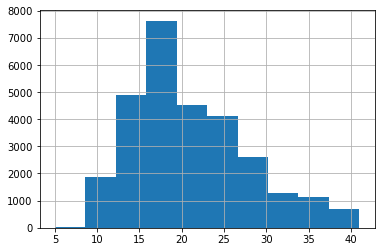

In [24]:
y.hist()

In [26]:
y_scale = scaler.fit_transform(np.array(y).reshape(-1,1))

### Feature Selection 

In [32]:
X_scale.shape

(28818, 16)

#### Variance threshold

In [33]:
X_scale.var(axis=0)

array([0.20592557, 0.0850752 , 0.10947989, 0.00089053, 0.03485302,
       0.03308981, 0.06920725, 0.04517157, 0.05768167, 0.02486714,
       0.05853942, 0.03022342, 0.05884658, 0.03650639, 0.02989851,
       0.03226786])

In [36]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05)
X_keep = selector.fit_transform(X_scale)
selector.get_support() # colonne/features selectionnées
for i in np.array(X.columns)[selector.get_support()]:
    print(i)

print(X_keep.shape)

MONTH
DAY_OF_MONTH
DAY_OF_WEEK
CRS_DEP_M
CRS_ARR_M
Humidity
Wind Gust
(28818, 7)


#### Recursive model

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV

selector = RFECV(LinearRegression(), step=1, min_features_to_select=8, cv=5)
X_rfe = selector.fit_transform(X_scale,y_scale)
#np.array(iris.feature_names)[selector.get_support()]

In [74]:
np.array(X.columns)[selector.get_support()]

array(['DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'Temperature',
       'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr'],
      dtype=object)

### Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

def model_cv(estimator, X, Y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scr = cross_validate(estimator, X_train, y_train, cv=5)
    print(estimator.__class__.__name__)
    #print(scr['test_neg_mean_squared_error'])
    print(scr['test_score'])

In [48]:
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
model_cv(estimator, X_keep, y_scale)

LinearRegression
[0.01450998 0.01549204 0.01798799 0.01561304 0.01285708]


0.01653553733140367


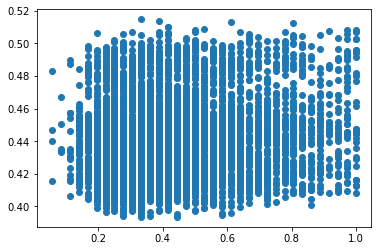

In [58]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_keep, y_scale, test_size=0.2)
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

scr = estimator.score(X_test, y_test)
print(scr)
plt.scatter(y_test, y_pred);

In [66]:
from sklearn.model_selection import train_test_split

def model_run(estimator, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X_keep, y_scale, test_size=0.2)
    
    estimator = LinearRegression()
    estimator.fit(X_train, y_train)
    
    y_pred = estimator.predict(X_test)
    scr = estimator.score(X_test, y_test)
    print(estimator.__class__.__name__)
    print('score = {:.1%}'.format(scr))
    plt.scatter(y_test, y_pred)
    plt.show();
    print(' ')

LinearRegression
score = 1.6%


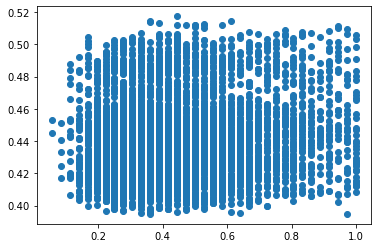

In [67]:
model_run(LinearRegression(), X_scale, y_scale)

### Several Models

LinearRegression
score = 1.7%


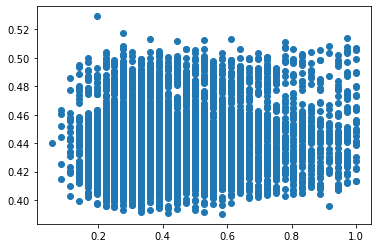

 
LinearRegression
score = 1.8%


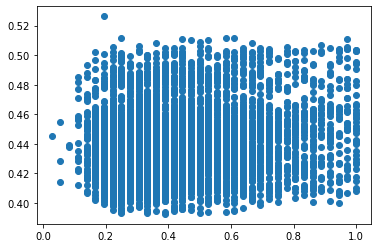

 
LinearRegression
score = 1.3%


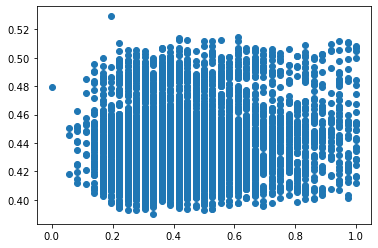

 
LinearRegression
score = 1.2%


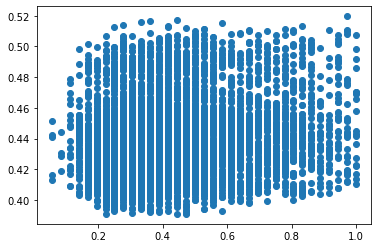

 
LinearRegression
score = 1.6%


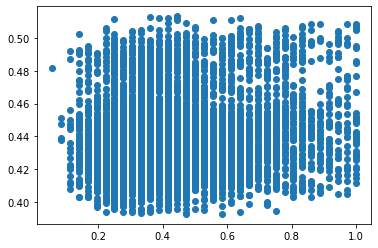

 
LinearRegression
score = 1.8%


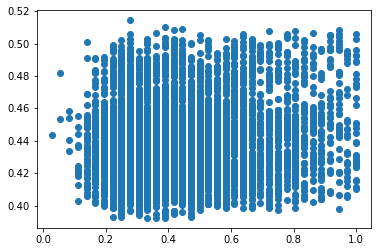

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor()



list_estimators = [reg, ridge, lasso, knn, svr, tree]

for estimator in list_estimators:
    model_run(estimator, X_keep, y_scale)

LinearRegression
score = 1.3%


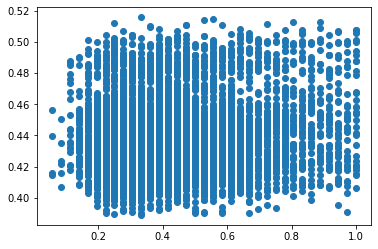

 
LinearRegression
score = 1.3%


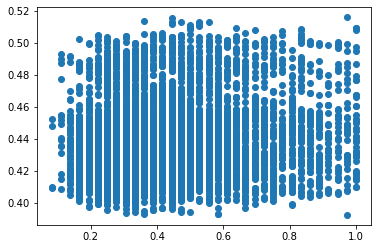

 
LinearRegression
score = 1.7%


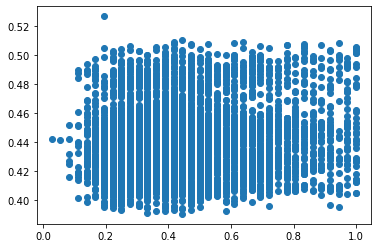

 
LinearRegression
score = 1.6%


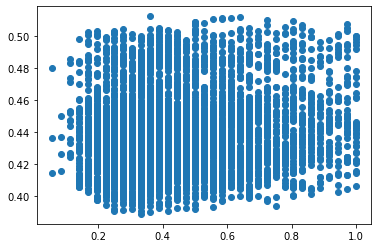

 
LinearRegression
score = 1.4%


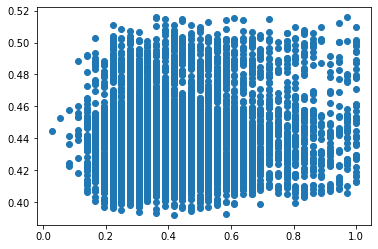

 
LinearRegression
score = 1.7%


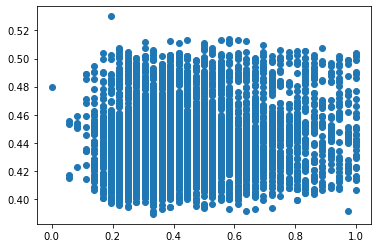

In [76]:
for estimator in list_estimators:
    model_run(estimator, X_rfe, y_scale)